In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re

In [4]:
fields = ['episode', 'reward', 'ep_block_prob', 'ep_accepted_requests', 'avg_deployment_cost',
        'avg_total_latency', 'avg_access_latency', 'avg_proc_latency',
        'avg_throuput_in', 'avg_packetsize_in', 'avg_interarrival_in', 
        'avg_throuput_out','avg_packetsize_out','avg_interarrival_out',
        'avg_qoe','gini', 'execution_time']

## Copare mean during training and testing

In [8]:
import os
import re
import pandas as pd

# Directory paths for training and testing logs
train_dir = './run_metrics'
test_dir = './run_metrics_test'

# Metric columns to calculate means
metric_columns = ['avg_qoe', 'gini', 'avg_total_latency', 'avg_deployment_cost', 'ep_accepted_requests']

# Listing training and testing files
train_files = set(sorted([f for f in os.listdir(train_dir) if f.endswith('.csv')]))
test_files = set(sorted([f for f in os.listdir(test_dir) if f.endswith('.csv')]))
names = list(train_files.intersection(test_files))

# Pattern to extract variables from the filename
pattern = r"(?P<alg>.+)_env_(?P<env_name>.+)_qoe_(?P<qoe_included>.+)_obj_(?P<obj_included>.+)_cw_(?P<cost_weight>.+)_qw_(?P<qoe_weight>.+)_lw_(?P<latency_weight>.+)_gw_(?P<gini_weight>.+)_sim_(?P<qoe_simulation_mode>.+)_acc_(?P<qoe_accuracy>.+)"

# List to hold all results
results = []

for file_name in names:
    # Match the pattern against the file name
    name = file_name.replace('.csv.csv', '')
    match = re.match(pattern, name)
    
    if match:
        # Extract variables
        variables = match.groupdict()
        train_file = os.path.join(train_dir, file_name)
        test_file = os.path.join(test_dir, file_name)
        
        # Load training and testing data
        df_train = pd.read_csv(train_file, on_bad_lines='skip')
        df_test = pd.read_csv(test_file, on_bad_lines='skip')
    
        # Calculate means for metrics
        train_means = df_train[metric_columns]
        test_means = df_test[metric_columns]

        # Convert means to dictionaries and add prefixes to keys
        train_dic = {f"train_{k}": np.asanyarray(list(v.values()))[:100] for k, v in train_means.to_dict().items()}
        test_dic = {f"test_{k}": np.asanyarray(list(v.values()))[:100] for k, v in test_means.to_dict().items()}
        
        # Combine variables, train, and test dictionaries
        #combined_result = {**variables, **train_dic, **test_dic}
        combined_result = {**variables, **train_dic, **test_dic}
        

        # Add the combined result to the results list
        results.append(combined_result)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)


results_df = results_df.astype({'cost_weight': 'float64', 'qoe_weight': 'float64', 'latency_weight': 'float64', 'gini_weight': 'float64'})

In [22]:
results_df[results_df['qoe_included'] == 'False']

,alg,env_name,qoe_included,obj_included,cost_weight,qoe_weight,latency_weight,gini_weight,qoe_simulation_mode,qoe_accuracy,train_avg_qoe,train_gini,train_avg_total_latency,train_avg_deployment_cost,train_ep_accepted_requests,test_avg_qoe,test_gini,test_avg_total_latency,test_avg_deployment_cost,test_ep_accepted_requests
2,mask_ppo,nne,False,False,0.00,0.00,1.00,0.00,Real,0.0,"[8.74, 4.9, 4.95, 5.1, 6.47, 4.3, 4.59, 6.44, ...","[0.12, 0.02, 0.1, 0.23, 0.06, 0.14, 0.17, 0.1,...","[24.97, 26.08, 26.63, 33.4, 28.17, 27.72, 22.4...","[8.74, 20.82, 11.31, 32.66, 27.06, 23.85, 9.38...","[74, 80, 84, 83, 83, 78, 66, 81, 80, 80, 72, 7...","[6.98, 4.35, 7.23, 7.09, 6.59, 4.82, 5.15, 5.1...","[0.08, 0.1, 0.1, 0.06, 0.16, 0.15, 0.02, 0.1, ...","[31.4, 31.78, 33.25, 31.32, 31.84, 33.51, 32.8...","[9.79, 16.98, 27.16, 18.9, 8.9, 21.94, 23.52, ...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
3,mask_ppo,nne,False,True,0.50,0.00,0.00,0.50,Real,0.0,"[3.99, 6.8, 6.99, 8.06, 3.86, 4.33, 6.07, 4.14...","[0.17, 0.13, 0.11, 0.1, 0.1, 0.09, 0.18, 0.11,...","[28.65, 29.61, 24.33, 29.68, 27.72, 23.46, 25....","[11.12, 28.05, 8.49, 27.35, 22.79, 17.67, 12.1...","[78, 84, 77, 83, 81, 67, 72, 81, 78, 79, 80, 8...","[9.01, 9.22, 3.59, 8.02, 5.18, 3.5, 7.18, 4.09...","[0.2, 0.56, 0.32, 0.38, 0.26, 0.6, 0.31, 0.39,...","[34.14, 62.52, 40.4, 42.13, 35.56, 71.22, 39.8...","[8.38, 5.5, 19.43, 8.2, 7.42, 5.56, 11.84, 8.8...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
9,mask_ppo,nne,False,True,0.00,0.00,1.00,0.00,Real,0.0,"[7.38, 6.8, 5.33, 6.55, 7.3, 6.7, 5.49, 6.56, ...","[0.19, 0.05, 0.15, 0.08, 0.07, 0.12, 0.14, 0.1...","[27.2, 25.77, 24.28, 28.04, 26.76, 25.58, 24.6...","[11.22, 19.92, 9.04, 25.04, 28.26, 20.55, 10.7...","[74, 79, 73, 80, 76, 73, 75, 85, 70, 87, 84, 8...","[6.65, 4.29, 5.68, 5.98, 6.71, 5.59, 8.09, 6.1...","[0.05, 0.08, 0.06, 0.1, 0.06, 0.1, 0.11, 0.06,...","[30.97, 31.58, 32.91, 31.56, 30.59, 32.1, 34.1...","[9.58, 18.2, 28.44, 17.54, 10.94, 19.09, 27.04...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
15,mask_ppo,nne,False,True,0.50,0.50,0.00,0.00,Real,0.0,"[7.13, 6.7, 6.05, 4.51, 5.76, 5.36, 4.55, 5.5,...","[0.19, 0.06, 0.1, 0.15, 0.07, 0.06, 0.16, 0.06...","[28.61, 26.51, 24.72, 27.76, 27.91, 26.98, 24....","[11.12, 20.15, 11.66, 24.92, 29.23, 21.8, 8.42...","[78, 80, 76, 73, 80, 80, 74, 86, 72, 80, 88, 8...","[6.28, 3.52, 9.01, 4.17, 3.7, 3.68, 6.34, 3.77...","[0.62, 0.74, 0.68, 0.62, 0.62, 0.74, 0.74, 0.7...","[75.64, 100.53, 85.94, 70.04, 71.61, 99.68, 10...","[5.47, 2.02, 9.4, 4.78, 7.06, 4.72, 8.0, 2.46,...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
45,mask_ppo,nne,False,True,0.00,0.00,0.50,0.50,Real,0.0,"[4.54, 5.65, 7.3, 4.66, 7.24, 7.08, 6.28, 5.44...","[0.31, 0.05, 0.1, 0.1, 0.08, 0.12, 0.19, 0.14,...","[33.82, 24.2, 25.82, 26.16, 26.58, 28.33, 26.4...","[13.15, 22.14, 11.14, 23.86, 27.49, 19.81, 11....","[79, 71, 81, 71, 75, 83, 76, 70, 84, 75, 79, 8...","[6.38, 7.8, 5.66, 6.84, 4.94, 3.93, 8.14, 8.23...","[0.12, 0.07, 0.1, 0.07, 0.09, 0.1, 0.08, 0.1, ...","[32.4, 31.5, 32.92, 32.11, 30.76, 32.3, 33.24,...","[10.15, 19.12, 24.47, 22.46, 9.64, 21.04, 21.7...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
46,mask_ppo,nne,False,True,0.00,1.00,0.00,0.00,Real,0.0,"[6.69, 6.23, 6.89, 6.53, 6.84, 5.14, 4.67, 5.3...","[0.2, 0.09, 0.09, 0.11, 0.14, 0.06, 0.15, 0.05...","[27.99, 25.36, 23.35, 26.37, 30.02, 26.99, 25....","[10.08, 16.73, 8.35, 28.99, 29.01, 18.77, 11.3...","[77, 77, 74, 70, 83, 81, 75, 80, 80, 79, 77, 7...","[3.43, 6.4, 5.01, 4.66, 5.14, 6.64, 9.62, 4.22...","[0.7, 0.69, 0.64, 0.62, 0.65, 0.7, 0.66, 0.7, ...","[95.02, 93.98, 82.79, 73.87, 79.62, 101.04, 79...","[15.58, 59.42, 12.74, 23.08, 4.58, 61.18, 9.68...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
56,mask_ppo,nne,False,False,0.00,0.00,0.50,0.50,Real,0.0,"[3.95, 6.43, 4.32, 5.64, 8.13, 5.42, 8.85, 5.4...","[0.16, 0.12, 0.11, 0.21, 0.03, 0.11, 0.23, 0.0...","[26.76, 28.55, 25.6, 32.28, 28.75, 27.02, 28.5...","[10.08, 18

results_df.to_pickle('results_balanced_latency_in_observation_SMOTE.pkl')

# Analysing The Results

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Focus on columns of interest for analysis
columns_of_interest = [
    'cost_weight', 'qoe_weight', 'qoe_included',
    'train_avg_qoe', 'test_avg_qoe',
    'train_avg_deployment_cost', 'test_avg_deployment_cost',
]

In [16]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Simulation')&(results_df['qoe_accuracy'] == '1.0')&(results_df['qoe_included'] == 'False')&(results_df['obj_included'] == 'True')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


ValueError: need at least one array to concatenate

<Figure size 640x480 with 0 Axes>

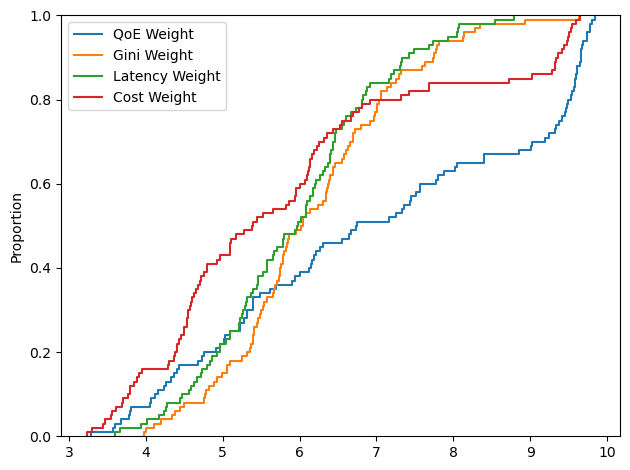

In [20]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Simulation')&(results_df['qoe_accuracy'] == '0.7')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'True')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


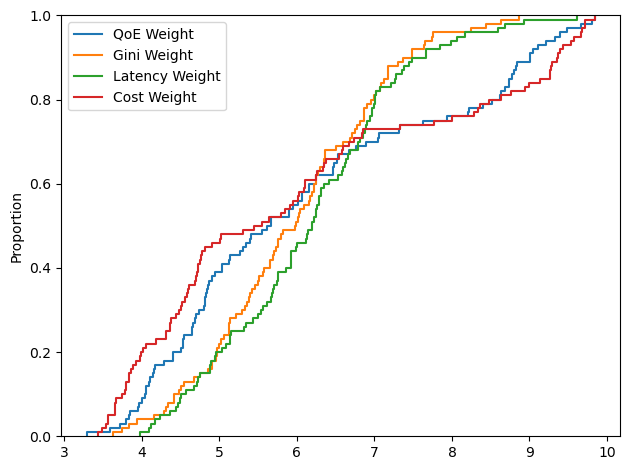

In [22]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Simulation')&(results_df['qoe_accuracy'] == '0.7')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'False')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


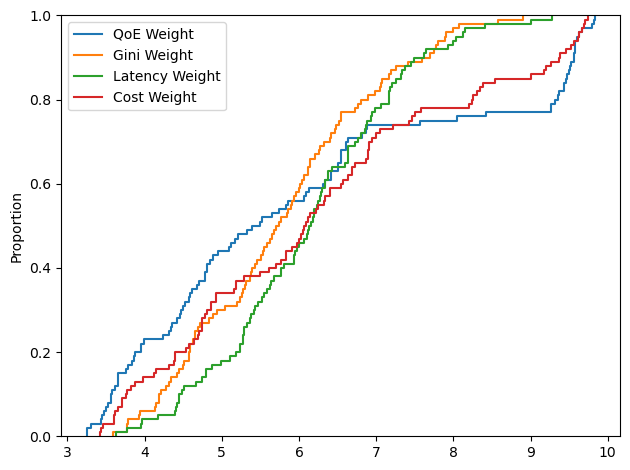

In [26]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Real')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'False')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


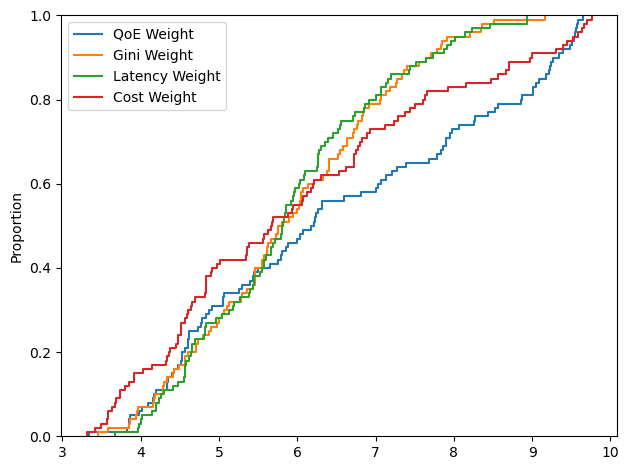

In [28]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Real')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'True')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


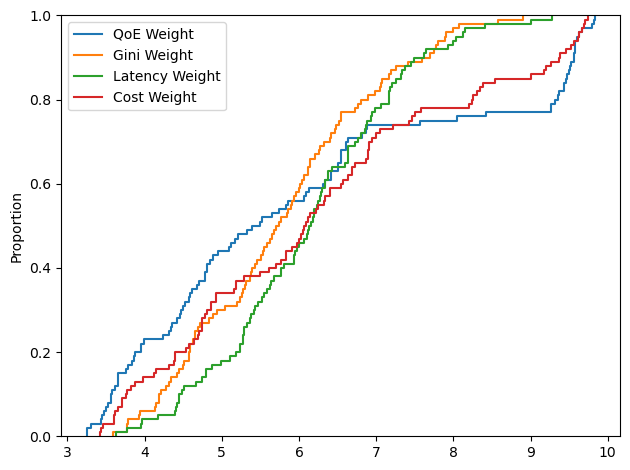

In [30]:
df = results_df[(results_df['qoe_simulation_mode'] == 'Real')&(results_df['qoe_included'] == 'True')&(results_df['obj_included'] == 'False')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## False True

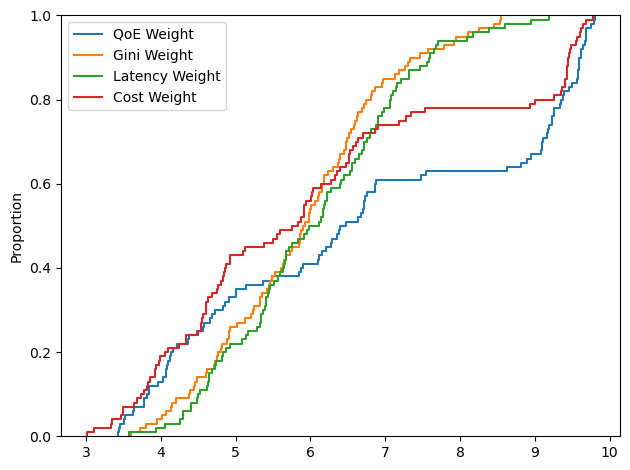

In [35]:
df = results_df[(results_df['qoe_included'] == 'False')]


# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

fig = plt.figure()    
# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    tt = np.vstack(filtered_df['test_avg_qoe'].values).mean(axis = 0)
    sns.ecdfplot(data= tt, label= label)

plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# Converting metrics to average

In [109]:
results_df_plain = results_df.copy()

In [111]:
intrested_column = ['train_avg_qoe','test_avg_qoe','train_gini','test_gini','train_avg_total_latency','test_avg_total_latency','train_avg_deployment_cost','test_avg_deployment_cost']

In [113]:
for metric in intrested_column:
    for idx in range(len(results_df_plain)):
        #print(np.mean(df.at[idx, metric]))
        results_df_plain.at[idx, metric] = np.mean(results_df_plain.at[idx, metric])

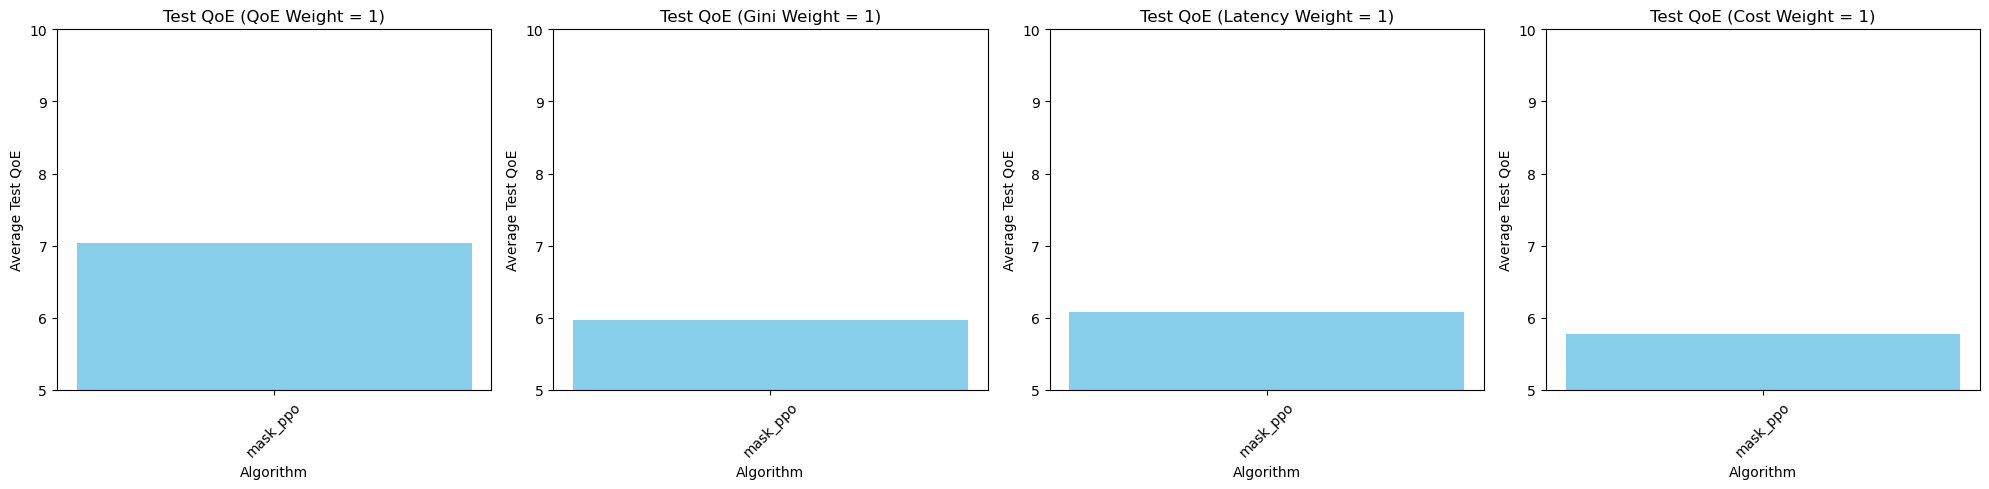

In [118]:
df = results_df_plain[(results_df_plain['qoe_accuracy'] == '1.0')&((results_df_plain['obj_included'] == 'True'))]

import matplotlib.pyplot as plt

# Define weight labels and their corresponding column names
weight_labels = ["QoE Weight", "Gini Weight", "Latency Weight", "Cost Weight"]
weight_columns = ["qoe_weight", "gini_weight", "latency_weight", "cost_weight"]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Iterate through each weight setting and create a bar plot
for i, (label, column) in enumerate(zip(weight_labels, weight_columns)):
    # Filter data where the specific weight is 1 and others are 0
    filtered_df = df[df[column] == 1.0]
    # Plot the bar chart
    axes[i].bar(filtered_df["alg"], filtered_df["test_avg_qoe"], color="skyblue")
    axes[i].set_title(f"Test QoE ({label} = 1)")
    axes[i].set_xlabel("Algorithm")
    axes[i].set_ylabel("Average Test QoE")
    axes[i].set_ylim([5,10])
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


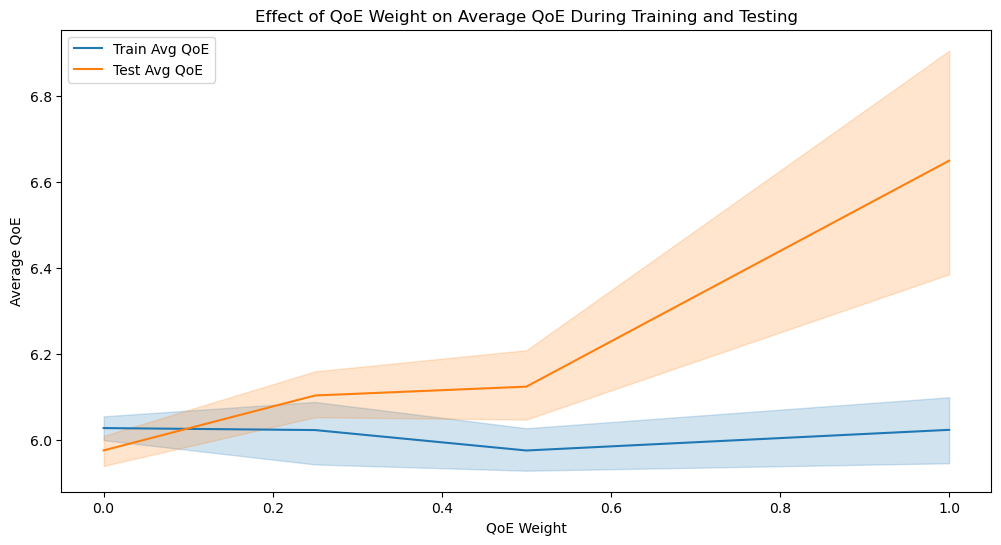

In [122]:
# Analyze the effect of 'qoe_weight' on 'train_avg_qoe' and 'test_avg_qoe'
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df_plain, x='qoe_weight', y='train_avg_qoe', label='Train Avg QoE')
sns.lineplot(data=results_df_plain, x='qoe_weight', y='test_avg_qoe', label='Test Avg QoE')
plt.title('Effect of QoE Weight on Average QoE During Training and Testing')
plt.xlabel('QoE Weight')
plt.ylabel('Average QoE')
plt.legend()
plt.show()

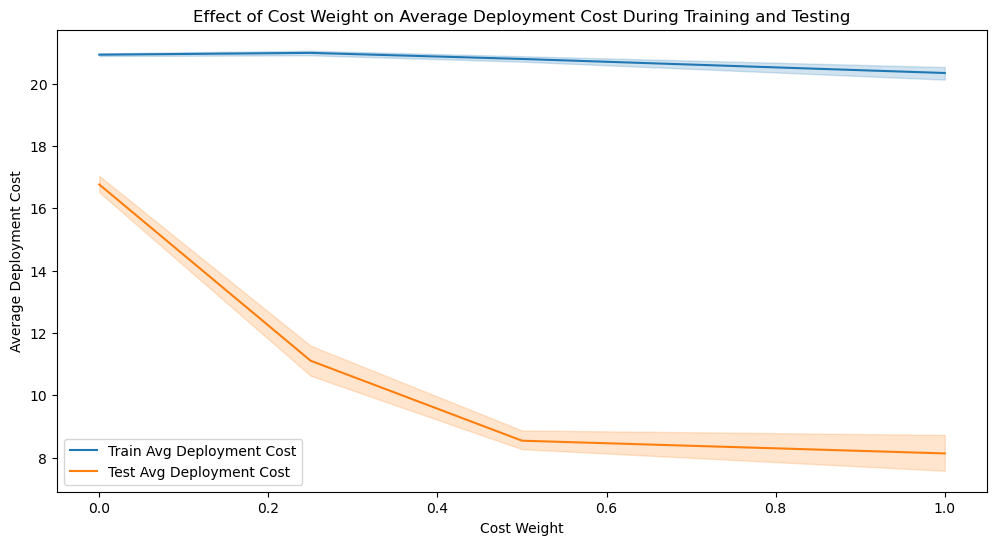

In [126]:
# Analyze the effect of 'cost_weight' on 'train_avg_deployment_cost' and 'test_avg_deployment_cost'
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df_plain, x='cost_weight', y='train_avg_deployment_cost', label='Train Avg Deployment Cost')
sns.lineplot(data=results_df_plain, x='cost_weight', y='test_avg_deployment_cost', label='Test Avg Deployment Cost')
plt.title('Effect of Cost Weight on Average Deployment Cost During Training and Testing')
plt.xlabel('Cost Weight')
plt.ylabel('Average Deployment Cost')
plt.legend()
plt.show()

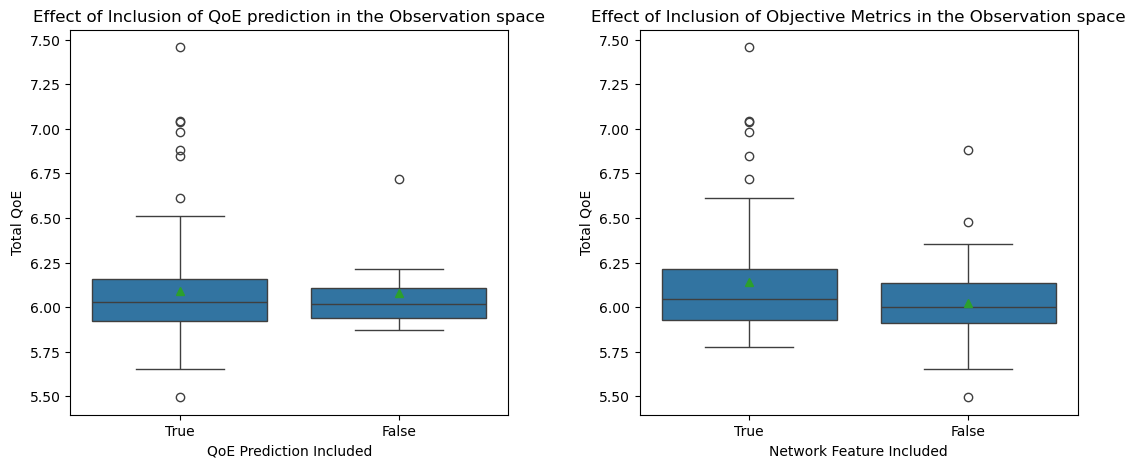

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Subplot 1: Train vs Test Average QoE
#sns.boxplot(data=results_df_plain, x='qoe_included', y='train_avg_qoe', showmeans=True, ax=axs[0])
sns.boxplot(data=results_df_plain, x='qoe_included', y='test_avg_qoe', showmeans=True, ax=axs[0])
axs[0].set_title('Effect of Inclusion of QoE prediction in the Observation space')
axs[0].set_xlabel('QoE Prediction Included')
axs[0].set_ylabel('Total QoE')
# Subplot 2: Train vs Test Total Latency
#sns.boxplot(data=results_df_plain, x='obj_included', y='train_avg_qoe', showmeans=True, ax=axs[1])
sns.boxplot(data=results_df_plain, x='obj_included', y='test_avg_qoe', showmeans=True, ax=axs[1])
axs[1].set_title('Effect of Inclusion of Objective Metrics in the Observation space')
axs[1].set_xlabel('Network Feature Included')
axs[1].set_ylabel('Total QoE')
# Show the combined figure
plt.savefig('Inclusion_qoe_obj.png')

plt.show()


In [134]:
results_df_plain[results_df_plain['qoe_included'] == 'False']

,alg,env_name,qoe_included,obj_included,cost_weight,qoe_weight,latency_weight,gini_weight,qoe_simulation_mode,qoe_accuracy,train_avg_qoe,train_gini,train_avg_total_latency,train_avg_deployment_cost,train_ep_accepted_requests,test_avg_qoe,test_gini,test_avg_total_latency,test_avg_deployment_cost,test_ep_accepted_requests
5,mask_ppo,nne,False,True,0.50,0.50,0.00,0.00,Real,0.0,5.7158,0.1549,31.5375,20.7195,"[78, 80, 76, 73, 80, 80, 74, 86, 72, 80, 88, 8...",6.2125,0.6339,77.3141,7.2893,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
13,mask_ppo,nne,False,True,0.00,0.50,0.00,0.50,Real,0.0,5.9935,0.1358,31.6859,21.0413,"[77, 80, 78, 71, 82, 85, 88, 78, 74, 85, 77, 7...",6.1531,0.1079,32.3288,17.0145,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
23,mask_ppo,nne,False,True,0.00,0.00,1.00,0.00,Real,0.0,6.0202,0.1475,31.6574,20.9192,"[74, 79, 73, 80, 76, 73, 75, 85, 70, 87, 84, 8...",6.056,0.102,31.9579,15.793,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
35,mask_ppo,nne,False,True,1.00,0.00,0.00,0.00,Real,0.0,5.9381,0.159,31.2122,20.878,"[82, 81, 83, 76, 85, 84, 77, 77, 79, 79, 79, 7...",6.0617,0.6623,85.6041,8.2951,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
40,mask_ppo,nne,False,True,0.00,1.00,0.00,0.00,Real,0.0,6.1604,0.1575,31.2496,20.6492,"[77, 77, 74, 70, 83, 81, 75, 80, 80, 79, 77, 7...",6.7164,0.6561,84.5847,19.9343,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
45,mask_ppo,nne,False,True,0.25,0.25,0.25,0.25,Real,0.0,6.085,0.1459,31.6763,21.1522,"[72, 77, 83, 78, 83, 87, 81, 75, 83, 83, 83, 8...",6.0167,0.2632,37.2664,10.619,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
60,mask_ppo,nne,False,True,0.00,0.00,0.00,1.00,Real,0.0,6.0146,0.1521,31.2446,20.9477,"[79, 81, 76, 76, 78, 80, 75, 77, 77, 74, 87, 8...",5.8902,0.0784,31.6252,16.4111,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
71,mask_ppo,nne,False,True,0.50,0.00,0.00,0.50,Real,0.0,6.1469,0.1538,31.4172,20.766,"[78, 84, 77, 83, 81, 67, 72, 81, 78, 79, 80, 8...",6.0014,0.3185,40.6051,9.1967,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
88,mask_ppo,nne,False,True,0.00,0.00,0.50,0.50,Real,0.0,5.8367,0.1422,31.3031,21.1193,"[79, 71, 81, 71, 75, 83, 76, 70, 84, 75, 79, 8...",5.9806,0.1227,32.6691,16.8322,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
89,mask_ppo,nne,False,True,0.50,0.00,0.50,0.00,Real,0.0,6.0568,0.1672,32.0566,20.9588,"[74, 81, 80, 78, 82, 83, 77, 78, 80, 80, 81, 7...",5.9,0.3259,40.6284,7.99,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."


In [146]:
results_df_plain[(results_df_plain['qoe_included'] == 'True')&(results_df_plain['obj_included'] == 'True')&(results_df_plain['qoe_simulation_mode'] == 'Real')]

,alg,env_name,qoe_included,obj_included,cost_weight,qoe_weight,latency_weight,gini_weight,qoe_simulation_mode,qoe_accuracy,train_avg_qoe,train_gini,train_avg_total_latency,train_avg_deployment_cost,train_ep_accepted_requests,test_avg_qoe,test_gini,test_avg_total_latency,test_avg_deployment_cost,test_ep_accepted_requests
7,mask_ppo,nne,True,True,0.00,1.00,0.00,0.00,Real,0.0,5.9859,0.1744,31.5407,20.7736,"[77, 77, 88, 77, 78, 78, 73, 79, 75, 76, 80, 7...",6.5094,0.5331,62.5538,20.1708,"[100, 100, 100, 100, 100, 100, 100, 100, 99, 1..."
12,mask_ppo,nne,True,True,0.50,0.50,0.00,0.00,Real,0.0,6.1557,0.1398,30.7329,20.2728,"[75, 86, 83, 75, 79, 75, 77, 80, 76, 76, 83, 7...",5.9209,0.5325,60.714,7.4696,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
17,mask_ppo,nne,True,True,0.50,0.00,0.50,0.00,Real,0.0,5.9659,0.1448,30.7716,20.9562,"[78, 77, 78, 79, 79, 77, 79, 74, 73, 83, 81, 8...",6.1579,0.3369,41.0812,8.6947,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
21,mask_ppo,nne,True,True,0.00,0.00,0.00,1.00,Real,0.0,6.0849,0.1474,31.2081,20.8806,"[79, 79, 70, 83, 79, 82, 78, 86, 76, 79, 77, 8...",5.8947,0.0772,31.6116,16.4907,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
32,mask_ppo,nne,True,True,1.00,0.00,0.00,0.00,Real,0.0,5.9828,0.1491,30.9908,20.6752,"[80, 72, 68, 81, 75, 82, 72, 81, 84, 78, 77, 8...",5.996,0.6065,69.2869,8.3556,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
49,mask_ppo,nne,True,True,0.00,0.50,0.00,0.50,Real,0.0,6.0474,0.1565,31.8213,20.9218,"[82, 78, 78, 79, 80, 81, 76, 82, 68, 81, 71, 8...",6.0329,0.1497,33.48,17.7456,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
52,mask_ppo,nne,True,True,0.00,0.50,0.50,0.00,Real,0.0,5.8929,0.1651,32.1254,20.8808,"[74, 80, 84, 82, 86, 78, 72, 83, 80, 88, 83, 7...",5.921,0.1673,33.8999,17.129,"[100, 100, 100, 100, 100, 100, 100, 100, 99, 1..."
64,mask_ppo,nne,True,True,0.25,0.25,0.25,0.25,Real,0.0,5.9416,0.1577,31.6517,21.0672,"[76, 86, 80, 74, 80, 78, 75, 78, 80, 82, 81, 8...",5.9825,0.2731,37.5592,9.9026,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
82,mask_ppo,nne,True,True,0.00,0.00,1.00,0.00,Real,0.0,5.928,0.149,31.1478,20.4386,"[80, 81, 85, 76, 73, 84, 82, 80, 79, 91, 79, 7...",5.8771,0.0877,31.7241,15.9114,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
97,mask_ppo,nne,True,True,0.00,0.00,0.50,0.50,Real,0.0,5.9568,0.1459,31.5276,20.9607,"[75, 75, 77, 78, 86, 77, 80, 80, 81, 85, 79, 8...",6.2213,0.0801,31.7112,16.4181,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."


In [144]:
results_df_plain[results_df_plain['qoe_included'] == 'False']

,alg,env_name,qoe_included,obj_included,cost_weight,qoe_weight,latency_weight,gini_weight,qoe_simulation_mode,qoe_accuracy,train_avg_qoe,train_gini,train_avg_total_latency,train_avg_deployment_cost,train_ep_accepted_requests,test_avg_qoe,test_gini,test_avg_total_latency,test_avg_deployment_cost,test_ep_accepted_requests
5,mask_ppo,nne,False,True,0.50,0.50,0.00,0.00,Real,0.0,5.7158,0.1549,31.5375,20.7195,"[78, 80, 76, 73, 80, 80, 74, 86, 72, 80, 88, 8...",6.2125,0.6339,77.3141,7.2893,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
13,mask_ppo,nne,False,True,0.00,0.50,0.00,0.50,Real,0.0,5.9935,0.1358,31.6859,21.0413,"[77, 80, 78, 71, 82, 85, 88, 78, 74, 85, 77, 7...",6.1531,0.1079,32.3288,17.0145,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
23,mask_ppo,nne,False,True,0.00,0.00,1.00,0.00,Real,0.0,6.0202,0.1475,31.6574,20.9192,"[74, 79, 73, 80, 76, 73, 75, 85, 70, 87, 84, 8...",6.056,0.102,31.9579,15.793,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
35,mask_ppo,nne,False,True,1.00,0.00,0.00,0.00,Real,0.0,5.9381,0.159,31.2122,20.878,"[82, 81, 83, 76, 85, 84, 77, 77, 79, 79, 79, 7...",6.0617,0.6623,85.6041,8.2951,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
40,mask_ppo,nne,False,True,0.00,1.00,0.00,0.00,Real,0.0,6.1604,0.1575,31.2496,20.6492,"[77, 77, 74, 70, 83, 81, 75, 80, 80, 79, 77, 7...",6.7164,0.6561,84.5847,19.9343,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
45,mask_ppo,nne,False,True,0.25,0.25,0.25,0.25,Real,0.0,6.085,0.1459,31.6763,21.1522,"[72, 77, 83, 78, 83, 87, 81, 75, 83, 83, 83, 8...",6.0167,0.2632,37.2664,10.619,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
60,mask_ppo,nne,False,True,0.00,0.00,0.00,1.00,Real,0.0,6.0146,0.1521,31.2446,20.9477,"[79, 81, 76, 76, 78, 80, 75, 77, 77, 74, 87, 8...",5.8902,0.0784,31.6252,16.4111,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
71,mask_ppo,nne,False,True,0.50,0.00,0.00,0.50,Real,0.0,6.1469,0.1538,31.4172,20.766,"[78, 84, 77, 83, 81, 67, 72, 81, 78, 79, 80, 8...",6.0014,0.3185,40.6051,9.1967,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
88,mask_ppo,nne,False,True,0.00,0.00,0.50,0.50,Real,0.0,5.8367,0.1422,31.3031,21.1193,"[79, 71, 81, 71, 75, 83, 76, 70, 84, 75, 79, 8...",5.9806,0.1227,32.6691,16.8322,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
89,mask_ppo,nne,False,True,0.50,0.00,0.50,0.00,Real,0.0,6.0568,0.1672,32.0566,20.9588,"[74, 81, 80, 78, 82, 83, 77, 78, 80, 80, 81, 7...",5.9,0.3259,40.6284,7.99,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
